In [141]:
# Dependencies
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import random
import numpy as np

In [142]:
#read file both files
education_csv = 'ResourceIn/education.csv'
Population_csv = 'ResourceIn/cnty_growth.csv'

In [143]:
#create dataframe and drop null 
college_df = pd.read_csv(education_csv, encoding="utf-8")

In [144]:
#display chart
college_df.head()

,Area Name,Area Type,Year,Variable,Value
0,New Hanover,NaN,2012,Public College Enrollment,4110
1,Mecklenburg,NaN,2013,Public College Enrollment,17005
2,Union,NaN,2012,Private College Enrollment,883
3,Currituck,NaN,2016,Private College Enrollment,32
4,Johnston,NaN,2014,Private College Enrollment,705


In [145]:
#drop variable column and display 
college_df.drop('Area Type',axis=1, inplace=True)
college_df.drop('Variable',axis=1, inplace=True)
college_df.head()

,Area Name,Year,Value
0,New Hanover,2012,4110
1,Mecklenburg,2013,17005
2,Union,2012,883
3,Currituck,2016,32
4,Johnston,2014,705


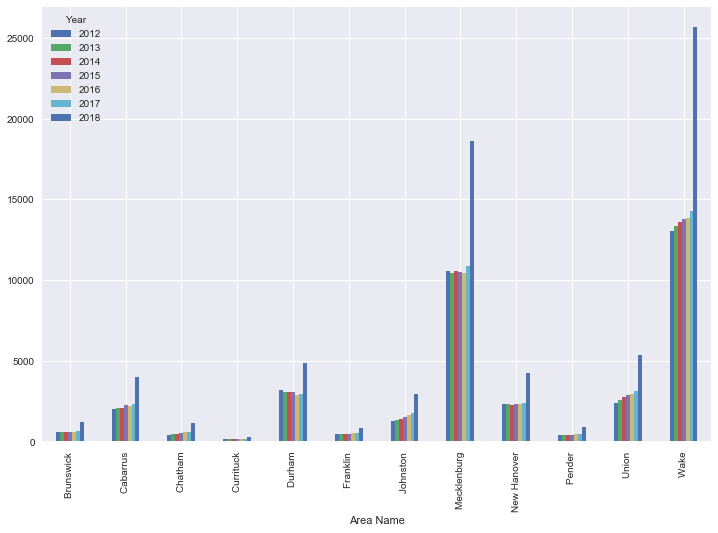

In [146]:
#chart results
ed_chart = pd.pivot_table(college_df, index='Area Name', columns = 'Year', values = 'Value')
college_df.head(12)

plt.style.use('seaborn')


ed_chart.plot.bar(figsize=(12,8))

In [147]:
#rename a columm
county_ch = college_df.rename({'Area Name': 'County'}, axis=1)
county_ch.head()

,County,Year,Value
0,New Hanover,2012,4110
1,Mecklenburg,2013,17005
2,Union,2012,883
3,Currituck,2016,32
4,Johnston,2014,705


In [148]:
# Set the index to be "County" so they will be used as labels
filter_ed = county_ch.set_index("County")

filter_ed.head()

,Year,Value
County,,
New Hanover,2012,4110
Mecklenburg,2013,17005
Union,2012,883
Currituck,2016,32
Johnston,2014,705


In [149]:
#count rows
filter_ed.shape

(156, 2)

In [150]:
#Identify columns
filter_ed.columns    

Index(['Year', 'Value'], dtype='object')

In [151]:
#creat a chart with years 2017 and 2018
compare_yr = filter_ed.loc[filter_ed["Year"] >= 2017, [ "Year", "Value"]]
#change column name
compare_yr.head()

,Year,Value
County,,
Pender,2018,904
Pender,2017,824
Chatham,2017,1045
Johnston,2017,2662
Durham,2017,1069


In [152]:
#count the rows to identify the changes
compare_yr.shape

(36, 2)

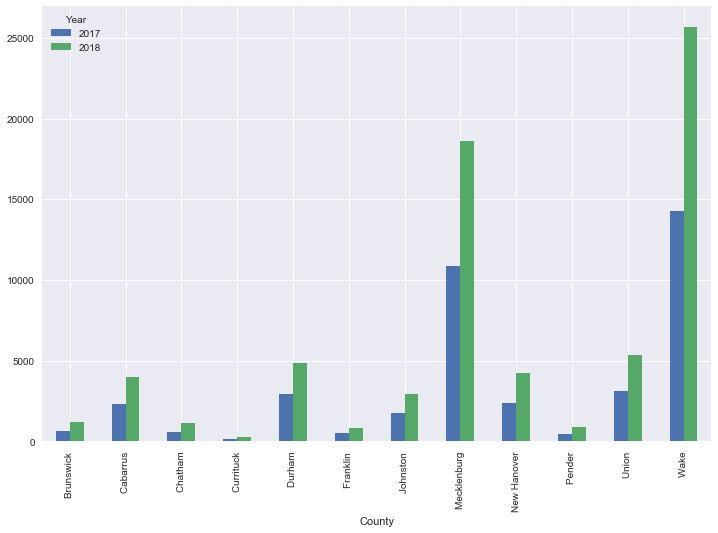

In [153]:
#create bar chart comparing the top three countys with biggiest increase in college enrollment
top_three = pd.pivot_table(compare_yr, index='County', columns = 'Year', values = 'Value')


plt.style.use('seaborn')


top_three.plot.bar(figsize=(12,8))